<a href="https://colab.research.google.com/github/FernandoGuillen-lab/DataScience/blob/main/machinelearning_con_PySpark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=86ad395afa157a79108544bf1bbf12dfbb29579759a966db1f05fb07ca9b114d
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


In [ ]:
!pip install heatmapz

In [ ]:
from pyspark.sql import SparkSession
from pyspark import SparkContext, SparkConf, SQLContext

In [ ]:
sc = SparkContext.getOrCreate(SparkConf().setMaster("local[*]"))
spark = SparkSession.builder.getOrCreate()
sqlContext = SQLContext(sc)
###
# to retrieve SparkContext version
sc.version

/usr/local/lib/python3.10/dist-packages/pyspark/sql/context.py:113: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


'3.5.1'

In [ ]:
df= spark.read.csv("/content/drive/MyDrive/Colab Notebooks/0.txcac4jc1km0.j4ktihv2ofMonterreyPollutionData2.csv", header=True, inferSchema=True)

df.show()

+---------+-----+---+-------+-------+----+----+----+----+----+---+----+-----+-----+-----+---+-----+----+---+---+
|     Date|Month|Day|DayWeek|WeekDay|Hour|  CO|  NO| NO2| NOX| O3|PM10|PM2.5|  PRS|RAINF| RH|   SR|TOUT|WSR|WDV|
+---------+-----+---+-------+-------+----+----+----+----+----+---+----+-----+-----+-----+---+-----+----+---+---+
|01-ene-15|    1|  1|    jue|      5|   1|2.51|10.2|12.9|23.1| 10| 139|   80|725.4| 0.01| 96|  0.0|3.91|7.2|344|
|01-ene-15|    1|  1|    jue|      5|   2|2.41| 9.2|11.6|20.8|  7|  42|   29|725.0| 0.02| 96|  0.0|3.81|6.3|341|
|01-ene-15|    1|  1|    jue|      5|   3|2.39| 8.1|11.8|19.9|  7|  23|    9|724.4|  0.0| 96|  0.0|3.85|5.2|346|
|01-ene-15|    1|  1|    jue|      5|   5|2.26| 5.3| 8.9|14.2|  7|  23|   14|724.0| 0.01| 96|  0.0|3.79|5.6|336|
|01-ene-15|    1|  1|    jue|      5|   8|2.25| 7.2|10.2|17.4|  5|  15|    8|724.3|  0.0| 96|0.023|3.93|4.8|354|
|01-ene-15|    1|  1|    jue|      5|   9|2.21| 5.8| 8.2|14.0|  7|  16|    6|724.3|  0.0| 96|0.0

In [ ]:
df.count()

3859

In [ ]:
variables= ["Date", "Month", "Day", "Dayweek", "WeekDay", "Hour"]

df= df.drop(*variables)

df.show()

+----+----+----+----+---+----+-----+-----+-----+---+-----+----+---+---+
|  CO|  NO| NO2| NOX| O3|PM10|PM2.5|  PRS|RAINF| RH|   SR|TOUT|WSR|WDV|
+----+----+----+----+---+----+-----+-----+-----+---+-----+----+---+---+
|2.51|10.2|12.9|23.1| 10| 139|   80|725.4| 0.01| 96|  0.0|3.91|7.2|344|
|2.41| 9.2|11.6|20.8|  7|  42|   29|725.0| 0.02| 96|  0.0|3.81|6.3|341|
|2.39| 8.1|11.8|19.9|  7|  23|    9|724.4|  0.0| 96|  0.0|3.85|5.2|346|
|2.26| 5.3| 8.9|14.2|  7|  23|   14|724.0| 0.01| 96|  0.0|3.79|5.6|336|
|2.25| 7.2|10.2|17.4|  5|  15|    8|724.3|  0.0| 96|0.023|3.93|4.8|354|
|2.21| 5.8| 8.2|14.0|  7|  16|    6|724.3|  0.0| 96|0.052|4.13|4.2| 15|
|2.38|10.0|10.1|20.1| 10|  22|   17|722.6|  0.0| 96|0.127| 6.6|3.2| 29|
|2.51|11.5|12.3|23.8| 12|  32|   16|721.7|  0.0| 95| 0.15|6.89|4.8|  2|
|2.55|12.0|13.5|25.5| 14|  31|   19|721.0|  0.0| 94|0.175|7.43|4.6| 47|
|2.45|10.5|12.8|23.3| 11|  50|   35|720.8|  0.0| 93|0.091|7.15|4.0| 42|
|2.59|11.4|14.0|25.4| 11|  45|   15|720.8|  0.0| 93|0.091|7.04|2

In [ ]:
from pyspark.ml.stat import Correlation
from pyspark.ml.feature import VectorAssembler
import pandas as pd
import numpy as np
import seaborn as sns
from heatmap import corrplot
from matplotlib import pyplot as plt
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator

In [ ]:
df = df.withColumnRenamed("PM2.5", "PM25")

df

DataFrame[CO: double, NO: double, NO2: double, NOX: double, O3: int, PM10: int, PM25: int, PRS: double, RAINF: double, RH: int, SR: double, TOUT: double, WSR: double, WDV: int]

In [ ]:
df.describe("CO", "NO", "NO2", "NOX", "O3", "PM10", "PM25", "PRS", "RAINF", "RH", "SR", "TOUT", "WSR", "WDV").show()

+-------+------------------+------------------+------------------+------------------+------------------+-----------------+------------------+------------------+--------------------+-----------------+-------------------+-----------------+------------------+------------------+
|summary|                CO|                NO|               NO2|               NOX|                O3|             PM10|              PM25|               PRS|               RAINF|               RH|                 SR|             TOUT|               WSR|               WDV|
+-------+------------------+------------------+------------------+------------------+------------------+-----------------+------------------+------------------+--------------------+-----------------+-------------------+-----------------+------------------+------------------+
|  count|              3859|              3859|              3859|              3859|              3859|             3859|              3859|              3859|            

In [ ]:
df.describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
CO,3859,1.8006219227779212,0.8720340991225567,0.29,8.56
NO,3859,13.503653796320318,26.856244699079294,2.3,414.3
NO2,3859,17.539284788381988,13.301006799154928,0.4,99.2
NOX,3859,30.973257321216455,36.090498039388464,3.1,436.0
O3,3859,22.658719875615443,16.51056131885926,2,92
PM10,3859,86.04949468774294,49.00887433131967,8,494
PM25,3859,27.675822752008294,16.849434279135153,5,123
PRS,3859,719.629955947137,3.6959485297554657,708.4,734.3
RAINF,3859,0.0026509458406322856,0.04244711534165332,0.0,2.4


In [ ]:
df_drop= df.na.drop()
df_columns=df_drop.columns

In [ ]:
vector_col= "corr_features"

assembler= VectorAssembler(inputCols= df_drop.columns, outputCol= vector_col)

df_vector= assembler.transform(df_drop).select(vector_col)

In [ ]:
r1= Correlation.corr(df_vector, vector_col)

print("PearsonCorrMatrix\n", r1.collect()[0]["pearson({})".format(vector_col)].values)

PearsonCorrMatrix
 [ 1.          0.5978396   0.67806613  0.69620186 -0.19644118  0.39680546
  0.21761599  0.2516326   0.01022539  0.10444278 -0.16654048 -0.41700365
 -0.34159064  0.23231139  0.5978396   1.          0.56241782  0.95203112
 -0.27525146  0.48105826  0.23270828  0.17522197 -0.00918152  0.06803896
 -0.10329943 -0.29105489 -0.34398556  0.25988794  0.67806613  0.56241782
  1.          0.78844922 -0.3029968   0.55036066  0.30202166  0.28501109
  0.00958004  0.00909931 -0.20073603 -0.44380969 -0.48823082  0.26174609
  0.69620186  0.95203112  0.78844922  1.         -0.31694119  0.56135302
  0.28465352  0.23613043 -0.00322652  0.05464747 -0.1511936  -0.38163917
 -0.43656775  0.29035356 -0.19644118 -0.27525146 -0.3029968  -0.31694119
  1.         -0.0468928  -0.00881133 -0.21973222 -0.03014244 -0.65558821
  0.6919266   0.52715429  0.46625389 -0.19879824  0.39680546  0.48105826
  0.55036066  0.56135302 -0.0468928   1.          0.51198907 -0.07659701
 -0.02553239 -0.10313337  0.0552

In [ ]:
#pearson_corr_arr= np.matrix(r1.collect()[0]["pearson({})".format(vector_col)].values).reshape(len(df.columns)-1, len(df.columns)-1)

pearson_corr_arr= np.matrix(r1.collect()[0]["pearson({})".format(vector_col)].values).reshape(len(df.columns), len(df.columns))

pearson_corr_df= pd.DataFrame(data= pearson_corr_arr, index=df_columns, columns= df_columns)

pearson_corr_df

,CO,NO,NO2,NOX,O3,PM10,PM25,PRS,RAINF,RH,SR,TOUT,WSR,WDV
CO,1.000000,0.597840,0.678066,0.696202,-0.196441,0.396805,0.217616,0.251633,0.010225,0.104443,-0.166540,-0.417004,-0.341591,0.232311
NO,0.597840,1.000000,0.562418,0.952031,-0.275251,0.481058,0.232708,0.175222,-0.009182,0.068039,-0.103299,-0.291055,-0.343986,0.259888
NO2,0.678066,0.562418,1.000000,0.788449,-0.302997,0.550361,0.302022,0.285011,0.009580,0.009099,-0.200736,-0.443810,-0.488231,0.261746
NOX,0.696202,0.952031,0.788449,1.000000,-0.316941,0.561353,0.284654,0.236130,-0.003227,0.054647,-0.151194,-0.381639,-0.436568,0.290354
O3,-0.196441,-0.275251,-0.302997,-0.316941,1.000000,-0.046893,-0.008811,-0.219732,-0.030142,-0.655588,0.691927,0.527154,0.466254,-0.198798
PM10,0.396805,0.481058,0.550361,0.561353,-0.046893,1.000000,0.511989,-0.076597,-0.025532,-0.103133,0.055220,0.059941,-0.139638,0.063298
PM25,0.217616,0.232708,0.302022,0.284654,-0.008811,0.511989,1.000000,-0.178029,0.030746,0.036154,-0.037306,0.083703,-0.071178,-0.032373
PRS,0.251633,0.175222,0.285011,0.236130,-0.219732,-0.076597,-0.178029,1.000000,0.005096,0.128509,-0.140521,-0.661163,-0.216032,0.134273
RAINF,0.010225,-0.009182,0.009580,-0.003227,-0.030142,-0.025532,0.030746,0.005096,1.000000,0.065507,-0.035976,-0.029789,-0.015195,0.003243
RH,0.104443,0.068039,0.009099,0.054647,-0.655588,-0.103133,0.036154,0.128509,0.065507,1.000000,-0.459958,-0.550910,-0.414917,0.068477


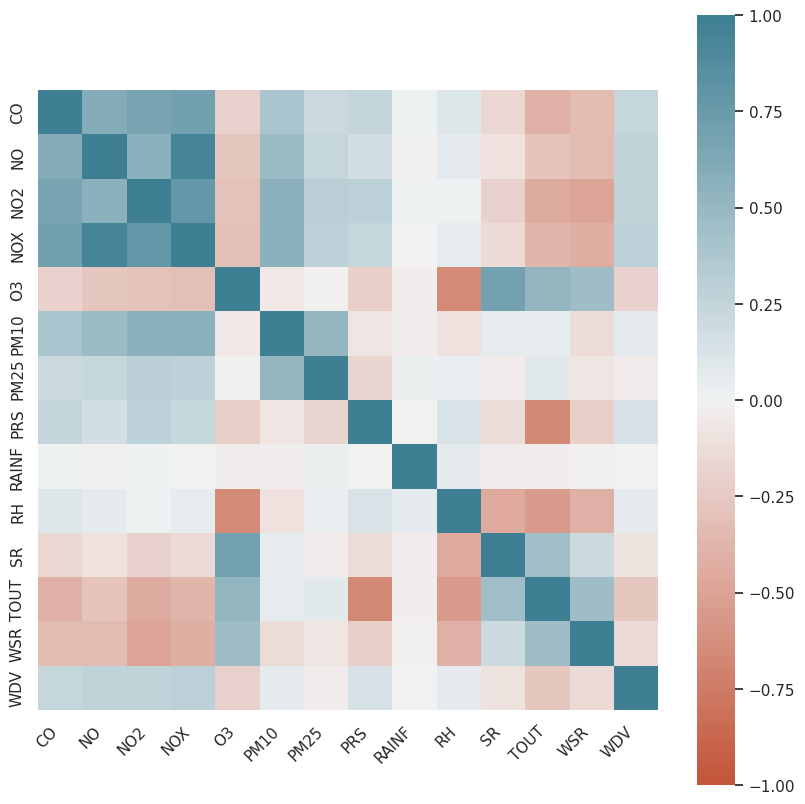

In [ ]:
sns.set(color_codes= True, font_scale= 1)

plt.figure(figsize=(10,10))

ax= sns.heatmap(pearson_corr_df, vmin= -1, vmax= 1, center= 0, cmap= sns.diverging_palette(20, 220, n=200), square= True)

ax.set_xticklabels(ax.get_xticklabels(), rotation= 45, horizontalalignment= "right");

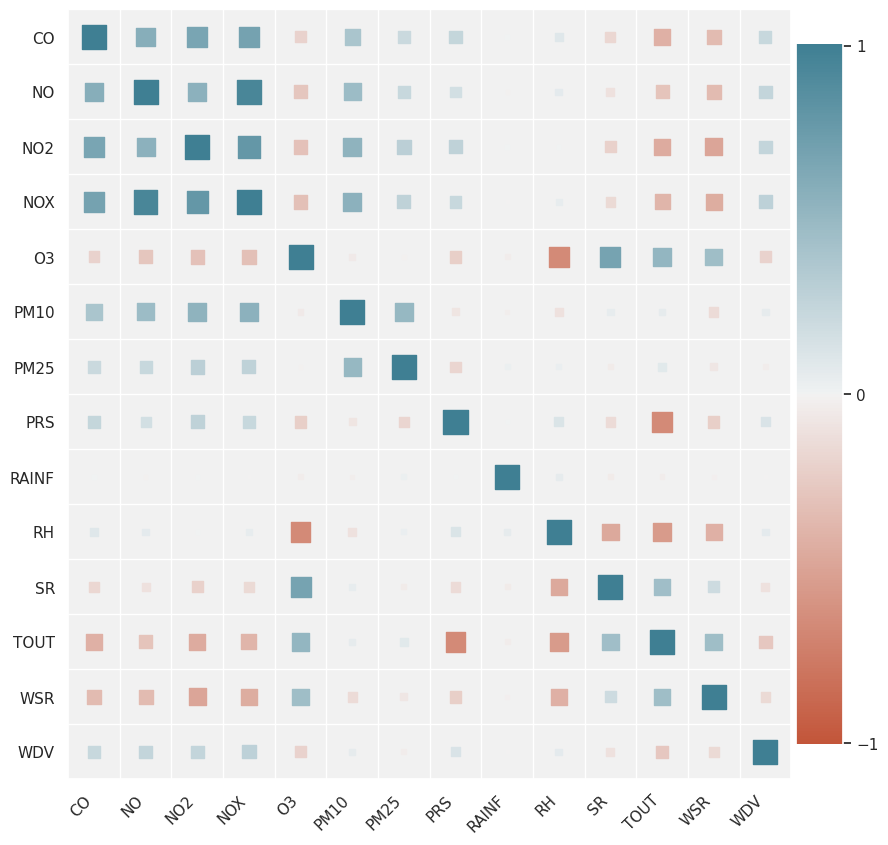

In [ ]:
plt.figure(figsize= (10,10))
corrplot(pearson_corr_df, size_scale= 300);

Para O3 las variables que lo afectan son:

*   SR con una correlación significativa de .6919, por lo que O3 aumenta con respecto a SR
*   RH con una correlación significativa de -.6555, por lo que O3 disminuye con respecto a RH
*   TOUT con una correlación significativa de .5271, por lo que O3 aumenta con respecto a TOUT

Para PM2.5 las variables que lo afectan son las siguientes:

*   PM10 con una correlación no tan significativa de .5119, por lo que PM2.5 aumenta con respecto a PM10



Text(0.5, 1.0, 'Correlación de PM2.5 vs PM10')

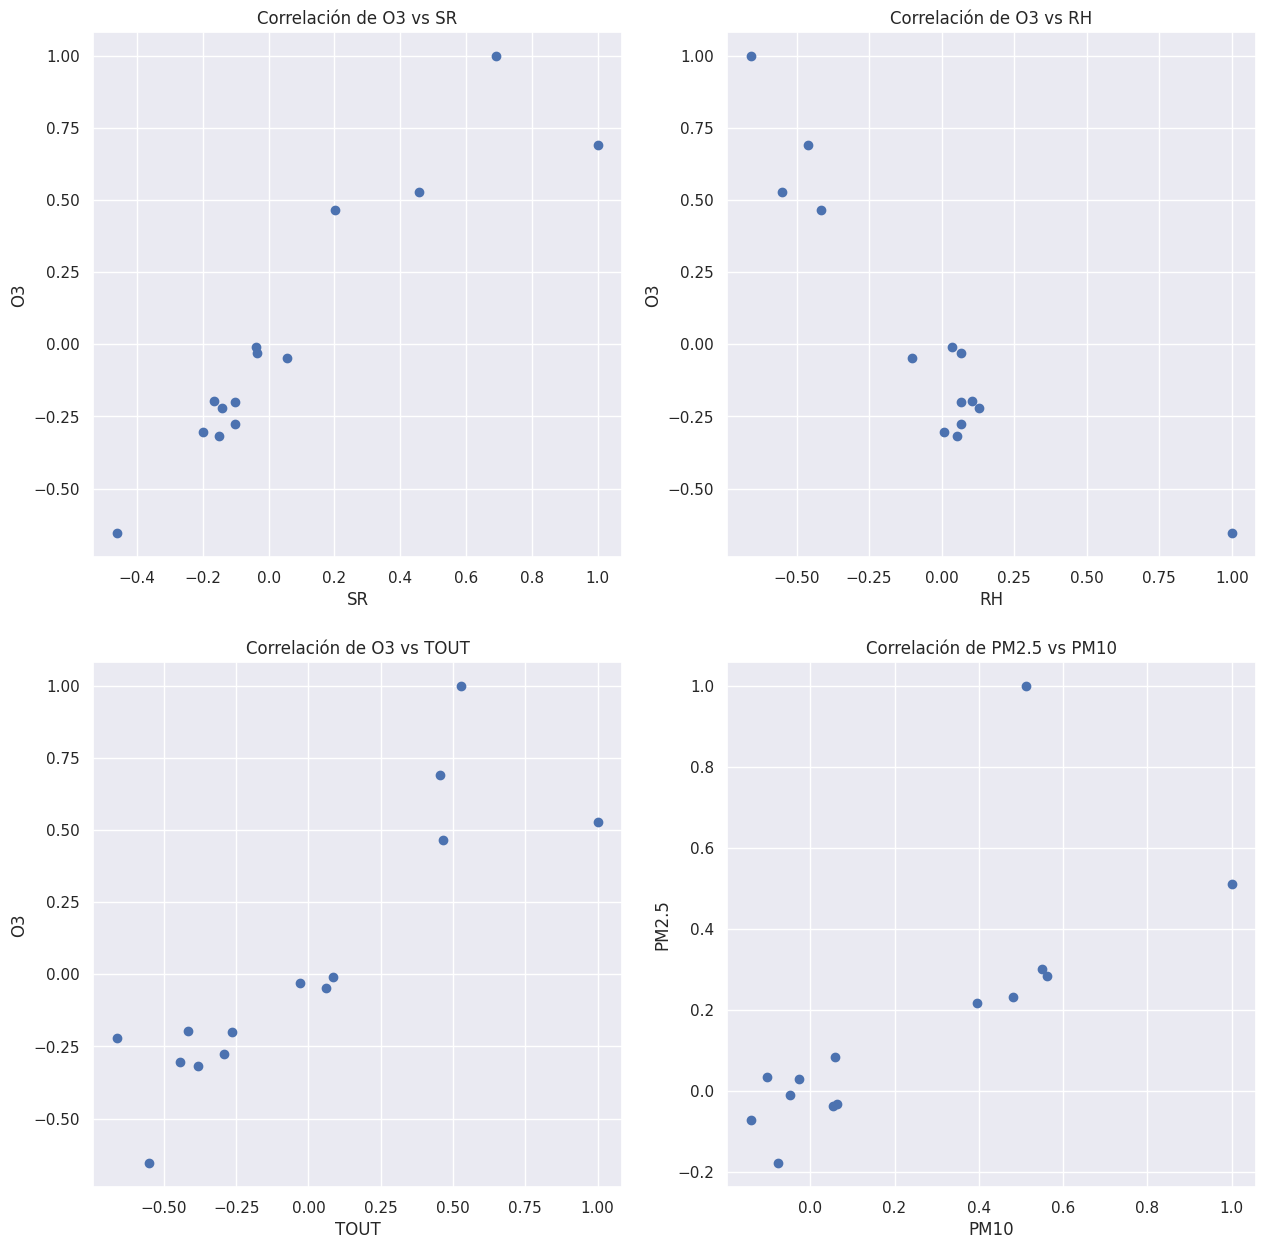

In [ ]:
fig, axes= plt.subplots(nrows= 2, ncols= 2, figsize= (15,15))

axes[0,0].scatter(pearson_corr_df["SR"], pearson_corr_df["O3"])
axes[0,0].set_xlabel("SR")
axes[0,0].set_ylabel("O3")
axes[0,0].set_title("Correlación de O3 vs SR")

axes[0,1].scatter(pearson_corr_df["RH"], pearson_corr_df["O3"])
axes[0,1].set_xlabel("RH")
axes[0,1].set_ylabel("O3")
axes[0,1].set_title("Correlación de O3 vs RH")

axes[1,0].scatter(pearson_corr_df["TOUT"], pearson_corr_df["O3"])
axes[1,0].set_xlabel("TOUT")
axes[1,0].set_ylabel("O3")
axes[1,0].set_title("Correlación de O3 vs TOUT")

axes[1,1].scatter(pearson_corr_df["PM10"], pearson_corr_df["PM25"])
axes[1,1].set_xlabel("PM10")
axes[1,1].set_ylabel("PM2.5")
axes[1,1].set_title("Correlación de PM2.5 vs PM10")

In [ ]:
assem= VectorAssembler(inputCols= ["CO", "NO", "NO2", "NOX", "PM10", "PRS", "RAINF", "RH", "SR", "TOUT", "WSR", "WDV"], outputCol= "Attributes")

output= assem.transform(df_drop)

finalized_data= output.select("Attributes", "O3" )

train_data, test_data= finalized_data.randomSplit([.8, .2])

In [ ]:
regressor_O3= LinearRegression(featuresCol= "Attributes", labelCol= "O3" )

regressor_O3= regressor_O3.fit(train_data)

print("El coeficiente del modelo es: %a", regressor_O3.coefficients)
print("El intercptor  del modelo es: %a", regressor_O3.intercept)



El coeficiente del modelo es: %a [2.940614672913738,-8.572950537084118,-8.740061210085026,8.482152669487274,0.002913814028210489,-0.571648795748929,4.175254471787382,-0.42176145899691064,29.061363145482684,-0.3372553083042073,0.5071861645426382,-0.01256285645689992]
El intercptor  del modelo es: %a 464.78177292636593


In [ ]:
Pred_lr_O3= regressor_O3.evaluate(test_data)


In [ ]:
Pred_lr_O3.predictions.show(10)

+--------------------+---+------------------+
|          Attributes| O3|        prediction|
+--------------------+---+------------------+
|[0.29,2.5,3.0,5.3...| 16|13.563021770397427|
|[0.3,2.8,6.4,8.9,...| 10| 11.79491084774611|
|[0.33,3.2,5.2,8.1...| 14|21.225389491534997|
|[0.33,4.0,6.0,9.7...| 11|10.679315926023264|
|[0.34,2.9,4.9,7.5...| 12|11.230297136093156|
|[0.34,3.0,5.1,7.9...| 12|13.927486916352962|
|[0.34,3.0,5.8,8.6...| 11|11.389079170892046|
|[0.35,3.0,6.1,8.9...| 11|11.498294470896099|
|[0.35,3.1,5.5,8.4...| 12|12.374272500177199|
|[0.35,3.9,6.5,10....| 10|11.078026766496123|
+--------------------+---+------------------+
only showing top 10 rows



In [ ]:
assem= VectorAssembler(inputCols= ["CO", "NO", "NO2", "NOX", "PM10", "PRS", "RAINF", "RH", "SR", "TOUT", "WSR", "WDV"], outputCol= "Attributes")

output= assem.transform(df_drop)

finalized_data= output.select("Attributes", "PM25" )

train_data, test_data= finalized_data.randomSplit([.8, .2])

In [ ]:
regressor_PM25= LinearRegression(featuresCol= "Attributes", labelCol= "PM25" )

regressor_PM25= regressor_PM25.fit(train_data)

print("El coeficiente del modelo es: %a", regressor_PM25.coefficients)
print("El intercptor  del modelo es: %a", regressor_PM25.intercept)

El coeficiente del modelo es: %a [1.1078239271174626,14.825260766918214,15.140546223280406,-14.836766689189698,0.14150881513299984,-0.5422483631350453,57.465597141596334,0.18237221657028205,-0.8121786795364907,0.24404149051744933,0.43311782183116104,-0.010906894986457144]
El intercptor  del modelo es: %a 377.54886192658614


In [ ]:
Pred_lr_PM25= regressor_PM25.evaluate(test_data)

In [ ]:
Pred_lr_PM25.predictions.show(10)

+--------------------+----+------------------+
|          Attributes|PM25|        prediction|
+--------------------+----+------------------+
|[0.29,2.5,3.0,5.3...|  16|30.999069307137177|
|[0.33,3.2,5.2,8.1...|  20|  35.3889342901914|
|[0.34,3.0,5.8,8.6...|  18| 20.21764443828539|
|[0.35,2.5,4.4,6.6...|  24|30.084009327693707|
|[0.4,3.2,5.6,8.7,...|  22|25.202146216597782|
|[0.45,3.5,4.8,8.1...|  39| 25.51134335445397|
|[0.45,5.9,9.2,15....|  20|20.240549189212516|
|[0.46,3.3,5.0,8.1...|  46| 35.35492818812742|
|[0.46,3.4,8.3,11....|  51| 23.83160689415422|
|[0.46,5.1,6.4,11....|  36|27.414529570932814|
+--------------------+----+------------------+
only showing top 10 rows



In [ ]:
print("Evaluacion de la regresión de O3")
print("Estimate  |  Std. Error  |  t Values  | P-value")

coef= np.append(list(regressor_O3.coefficients), regressor_O3.intercept)

Summary= regressor_O3.summary

for i in range (len(Summary.pValues)):
  print("{:10.6f}".format(coef[i]),\
  "{:10.6f}".format(Summary.coefficientStandardErrors[i]),\
  "{:8.3f}".format(Summary.tValues[i]),\
  "{:10.6f}".format(Summary.pValues[i]))

print("Mean squared error: %.6f"\
      %Summary.meanSquaredError,",\
      RMSE:%.6f"\
      %Summary.rootMeanSquaredError)

print("Multiple R-squared:%f"%Summary.r2,",\
Total iterations:%i"%Summary.totalIterations)



Evaluacion de la regresión de O3
Estimate  |  Std. Error  |  t Values  | P-value
  2.940615   0.278730   10.550   0.000000
 -8.572951   2.130054   -4.025   0.000058
 -8.740061   2.136548   -4.091   0.000044
  8.482153   2.131748    3.979   0.000071
  0.002914   0.004530    0.643   0.520144
 -0.571649   0.064787   -8.824   0.000000
  4.175254   3.432485    1.216   0.223929
 -0.421761   0.013319  -31.667   0.000000
 29.061363   0.755171   38.483   0.000000
 -0.337255   0.048785   -6.913   0.000000
  0.507186   0.055824    9.085   0.000000
 -0.012563   0.001785   -7.037   0.000000
464.781773  47.616414    9.761   0.000000
Mean squared error: 75.621006 ,      RMSE:8.696034
Multiple R-squared:0.711870 ,Total iterations:0


In [ ]:
print("Evaluacion de la regresión de PM2.5")
print("Estimate  |  Std. Error  |  t Values  | P-value")

coef= np.append(list(regressor_PM25.coefficients), regressor_PM25.intercept)

Summary= regressor_PM25.summary

for i in range (len(Summary.pValues)):
  print("{:10.6f}".format(coef[i]),\
  "{:10.6f}".format(Summary.coefficientStandardErrors[i]),\
  "{:8.3f}".format(Summary.tValues[i]),\
  "{:10.6f}".format(Summary.pValues[i]))

print("Mean squared error: %.6f"\
      %Summary.meanSquaredError,",\
      RMSE:%.6f"\
      %Summary.rootMeanSquaredError)

print("Multiple R-squared:%f"%Summary.r2,",\
Total iterations:%i"%Summary.totalIterations)

Evaluacion de la regresión de PM2.5
Estimate  |  Std. Error  |  t Values  | P-value
  1.107824   0.435765    2.542   0.011062
 14.825261   3.383874    4.381   0.000012
 15.140546   3.394380    4.460   0.000008
-14.836767   3.386553   -4.381   0.000012
  0.141509   0.007177   19.717   0.000000
 -0.542248   0.101560   -5.339   0.000000
 57.465597  16.950572    3.390   0.000707
  0.182372   0.021131    8.630   0.000000
 -0.812179   1.175079   -0.691   0.489511
  0.244041   0.076401    3.194   0.001416
  0.433118   0.087842    4.931   0.000001
 -0.010907   0.002754   -3.961   0.000076
377.548862  74.630542    5.059   0.000000
Mean squared error: 192.429874 ,      RMSE:13.871910
Multiple R-squared:0.323677 ,Total iterations:0


In [ ]:
eval_lr= RegressionEvaluator(labelCol= "O3", predictionCol= "prediction", metricName= "rmse")

print("Linear reggresion model O3\n")

rmse= eval_lr.evaluate(Pred_lr_O3.predictions)
print("RMSE:%.3f"%rmse)

mse= eval_lr.evaluate(Pred_lr_O3.predictions,{eval_lr.metricName: "mse"})
print("MSE:%.3f"%mse)

mae= eval_lr.evaluate(Pred_lr_O3.predictions,{eval_lr.metricName: "mse"})
print("MAE:%.3f"%mae)

r2= eval_lr.evaluate(Pred_lr_O3.predictions,{eval_lr.metricName: "r2"})
print("R2:%.3f"%r2)

Linear reggresion model O3

RMSE:9.170
MSE:84.084
MAE:84.084
R2:0.729


In [ ]:
eval_lr= RegressionEvaluator(labelCol= "PM25", predictionCol= "prediction", metricName= "rmse")

print("Linear reggresion model PM2.5\n")

rmse= eval_lr.evaluate(Pred_lr_PM25.predictions)
print("RMSE:%.3f"%rmse)

mse= eval_lr.evaluate(Pred_lr_PM25.predictions,{eval_lr.metricName: "mse"})
print("MSE:%.3f"%mse)

mae= eval_lr.evaluate(Pred_lr_PM25.predictions,{eval_lr.metricName: "mse"})
print("MAE:%.3f"%mae)

r2= eval_lr.evaluate(Pred_lr_PM25.predictions,{eval_lr.metricName: "r2"})
print("R2:%.3f"%r2)

Linear reggresion model PM2.5

RMSE:14.699
MSE:216.061
MAE:216.061
R2:0.230
